## Machine Learning Competition Notebook
### Student Name: 
Gagan Narula 20023081

#### Summary:
##### Kaggle Group - 4

###### Steps Used:

1) Data analysis
2) Data visualisation
2) Removing existing outliers 
3) Feature Engineering and Selection
4) Fitting the train data and target in the model
5) Prediction of price for test data
6) Cross validating  for accuracy and calculating MAPE for the models used.

###### Desciption:

A dataset of house pricing has been provided containing 16 features, where target column is 'Price' and the rest are the specifications of the house (details). We will try to build relation between them and our main target here is to predict the prices for the given houses (test data). After careful analysis we can find out that there are some columns that are not required. For example we are given country analysis of Dublin where all the house rows are. We can remove this column as it is not required and we can also remove environment column too. We have numerical as well as categorical data  and hence we will only be using  numerical data for analysis here. 
Dataset was visualised mainly to find the outliers and remove them as it would hinder our price prediction. We have visualized Price against surface , bathrooms and beds using scatterplot to get an in-depth knowledge of factors affecting Price. We have also visualized location data to check the outliers using scatter plot. Next we have used bar graphs to get to know the number of bedrooms and bathrooms. Lastly we have used an displot and boxplot to check the price range and the fluctuations in it.
 We have then used 'zscore' from scipy library to remove the outliers from our data. It is an approach to plonk different variables on the same scale. We used  it because data-set has varying scales. Sometimes the features of data-set  have exhaustive and large differences between their ranges. So, in this case, standardization overawes on the data-set to bring all on the same scale.
Next step would be cleaning the data because it helps us in identifying and correcting errors in the dataset that may negatively impact our predictive model. So here we have converted the categorical columns to numerical by using methods like replacing with frequency, label encoding, binarizing (for only 2 type of values.) and we have replaced the missing values with mode for the categorical columns and mean values for numerical columns. We have also removed columns  due to high absence of data in them.
Finally arriving at the final dataset for training with 8 columns and similarly converted the testing data for prediction. We have used Random forest model and XG boost to predict the prices apart from the base model that was used. Random forest helped us because it works well with continuous and categorical data. It also automates the missing values in data and improves accuracy of the model. We have also used XG Boost for regularization and parallel processing of the model. It also has built in cross validation methods which provides a clear picture of the model.  The Last process we used was we calculated the MAPE for both the models with 6.95 and 1.7 respectively. 




# IMPORTS AND LOADING GIVEN DATASET

In [1]:
#First I will be uploading all the necessary libraries that i have used while understanding and modelling of the data and i will be uploading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
# load dataset
dftest = pd.read_csv("/Users/gagannarula/Downloads/KAGGLE/House_pricing_dataset-master/dataset_csv/test.csv",index_col='ad_id')
dftrain  = pd.read_csv( "/Users/gagannarula/Downloads/KAGGLE/House_pricing_dataset-master/dataset_csv/train.csv",index_col='ad_id')
dftrain

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6


# DATA DESCRIPTION

In [15]:
# To have a clear view of the data i will be using the below code and finding out how the data looks like.
# There are some columns in the data that is useless and we will not be using it for analysis.
dftrain.info()
dftrain.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 996887 to 12428358
Data columns (total 16 columns):
area                  2982 non-null object
bathrooms             2931 non-null float64
beds                  2931 non-null float64
ber_classification    2305 non-null object
county                2982 non-null object
description_block     2982 non-null object
environment           2982 non-null object
facility              965 non-null object
features              2982 non-null object
latitude              2982 non-null float64
longitude             2982 non-null float64
no_of_units           59 non-null float64
price                 2892 non-null float64
property_category     2982 non-null object
property_type         2931 non-null object
surface               2431 non-null float64
dtypes: float64(7), object(9)
memory usage: 396.0+ KB


,count,mean,std,min,25%,50%,75%,max
bathrooms,2931.0,1.998635,1.291875,0.000000,1.000000,2.000000,3.000000,1.800000e+01
beds,2931.0,2.979188,1.468408,0.000000,2.000000,3.000000,4.000000,2.700000e+01
latitude,2982.0,53.355991,0.086748,51.458439,53.298929,53.345497,53.388845,5.363059e+01
longitude,2982.0,-6.257175,0.141906,-6.521183,-6.314064,-6.252254,-6.196049,-1.744995e+00
no_of_units,59.0,7.440678,8.937081,0.000000,2.000000,3.000000,8.000000,3.600000e+01
price,2892.0,532353.590941,567814.769401,19995.000000,280000.000000,380000.000000,575000.000000,9.995000e+06
surface,2431.0,318.851787,4389.423136,3.400000,74.100000,100.000000,142.000000,1.821085e+05


In [16]:
#FINDING NULL VALUES
dftrain.isnull().sum()

area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

# VISUALIZING OUR NUMERICAL DATA AND FINDING OUTLIERS

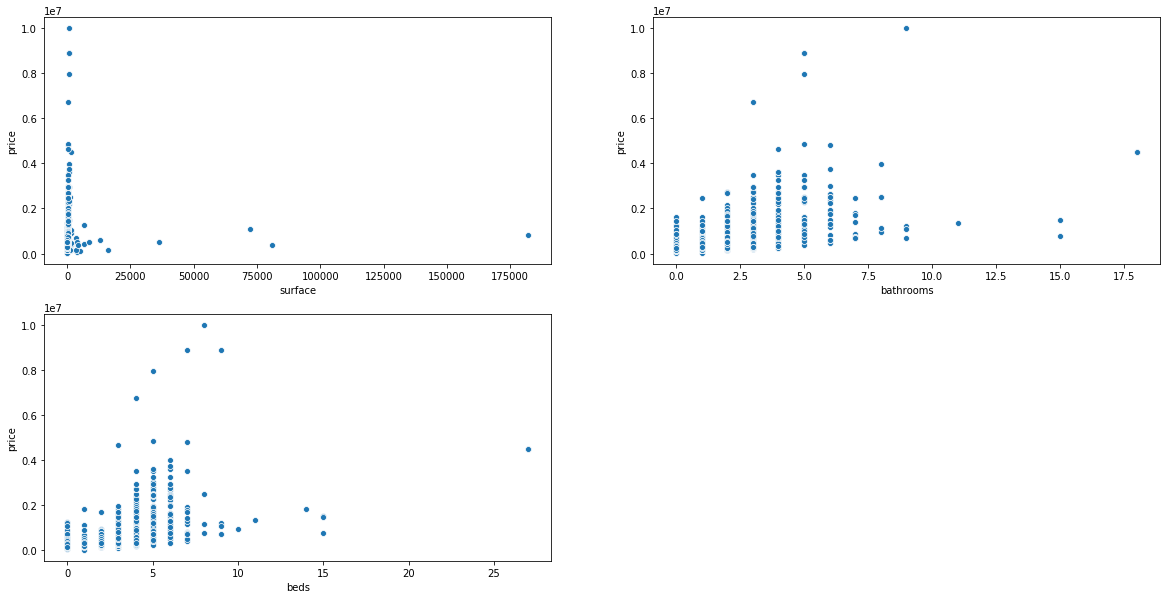

In [8]:
#visualizing price vs surface, bathrooms and beds. We are using scatteplot to draw a relationship b/w the variables.
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.scatterplot(dftrain['surface'], dftrain['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(dftrain['bathrooms'],dftrain['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(dftrain['beds'],dftrain['price'])

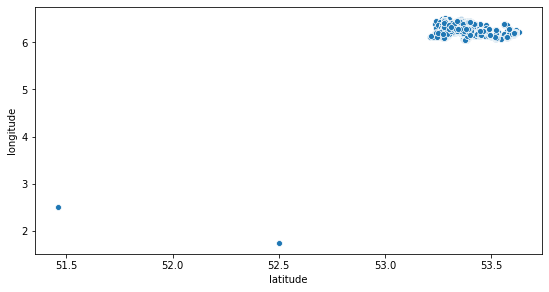

In [136]:
#Plotting location data that is longitude and latitude to get to know the outliers in the data
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.scatterplot(dftrain['latitude'],dftrain['longitude'].abs())

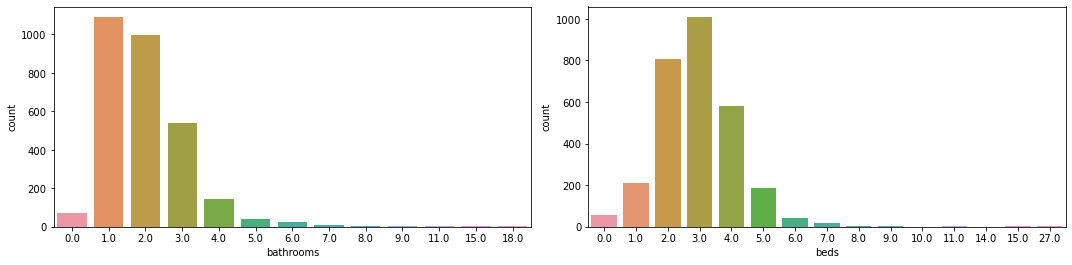

In [137]:
#visualizing bedrooms and bathrooms count
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(dftrain['bathrooms'])
fig.add_subplot(2,2,2)
sns.countplot(dftrain['beds'])
plt.tight_layout()

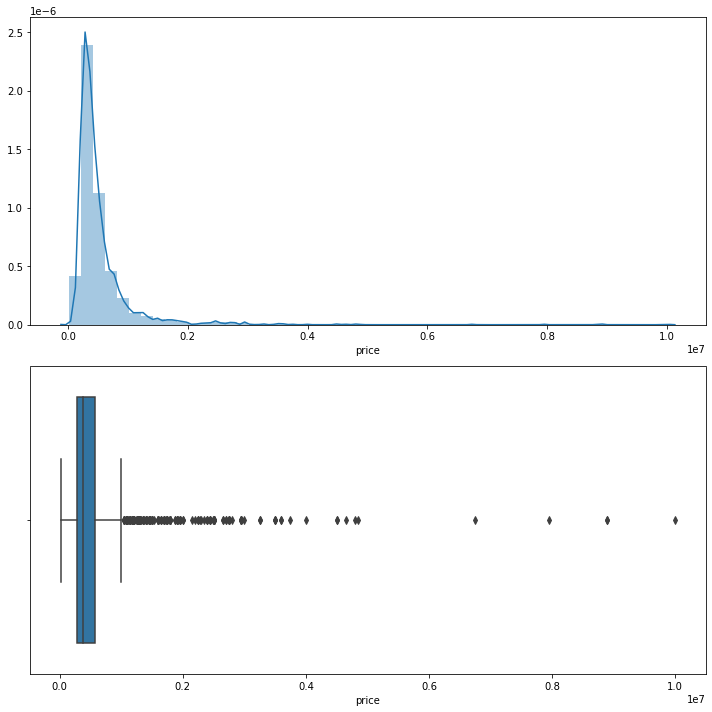

In [138]:
#Visualising Price Range

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,1,1)
sns.distplot(dftrain['price'])
fig.add_subplot(2,1,2)
sns.boxplot(dftrain['price'])
plt.tight_layout()

In [10]:
# We as a group have decided to Remove ber_classificaion and no_of_units due to high number null Values
# We are also removing County and Environment column as its same throughout
#print(dftrain['area'].value_counts())

# REMOVED OUTLIERS using zscore

In [17]:
new_data1=dftrain['surface']
new_data1=new_data1.dropna(axis=0)
z= np.abs(stats.zscore(new_data1))
remove=np.where(z>10)
l1=[]
for i in remove[0]:
    l1.append(new_data1.index[[i][0]])
    


new_data2=dftrain['beds']
new_data2=new_data2.dropna(axis=0)
z1= np.abs(stats.zscore(new_data2))
remove1=np.where(z1>10)
for i in remove1[0]:
    l1.append(new_data2.index[[i][0]])



new_data3=dftrain['bathrooms']
new_data3=new_data3.dropna(axis=0)
z2= np.abs(stats.zscore(new_data3))
remove2=np.where(z2>10)
for i in remove2[0]:
    l1.append(new_data3.index[[i][0]])

new_data4=dftrain['price']
new_data4=new_data4.dropna(axis=0)
z3= np.abs(stats.zscore(new_data4))
remove3=np.where(z3>10)
for i in remove3[0]:
    l1.append(new_data4.index[[i][0]])


l2=list(set(l1))

#print(dftrain.index==996887)
#for j in l2:
#    dftrain = dftrain[dftrain.index == j]
dfNEW=dftrain[~dftrain.index.isin(l2)]
#print(dfNEW)

In [18]:
dfNEW

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6


# FILLING UP NAN VALUES BY MEAN VALUE for Numerical Data
## Replacing Categorical values with frequency and then filling null values with Mode( Most repeated)

In [20]:
#Replacing by Mean for the following columns

dfNEW['bathrooms'] = dfNEW['bathrooms'].replace(np.NaN,dfNEW['bathrooms'].mode()[0])
dfNEW['beds'] = dfNEW['beds'].replace(np.NaN,dfNEW['beds'].mode()[0])
dfNEW['price'] = dfNEW['price'].replace(np.NaN,dfNEW['price'].mean())
dfNEW['surface'] = dfNEW['surface'].replace(np.NaN,dfNEW['surface'].mean())

# Considering area as a categorical column and label encoding it
dfNEW["area"] = dfNEW["area"].astype('category')
dfNEW["area"] = dfNEW["area"].cat.codes
dfNEW['area'] = dfNEW['area'].replace(np.NaN,dfNEW['area'].mode()[0])

#replacing by 0 and 1 for property category as there is only two types

dfNEW['property_category'] = dfNEW['property_category'].replace('new_development_parent',0)
dfNEW['property_category'] = dfNEW['property_category'].replace('sale',1)

#replacing by frequency

dfmap1 = dfNEW['property_type'].value_counts().to_dict()
dfNEW['property_type'] = dfNEW['property_type'].map(dfmap1)
dfNEW['property_type'] = dfNEW['property_type'].replace(np.NaN,dfNEW['property_type'].mode()[0])

#taking abs value of longitude
dfNEW['longitude']=dfNEW['longitude'].abs()

#rounding of the values for bed, bathrooms and price
dfNEW['bathrooms'] = dfNEW['bathrooms'].round()
dfNEW['beds'] = dfNEW['beds'].round()
dfNEW['price'] = dfNEW['price'].round()


/Applications/PYTHON/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/PYTHON/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/PYTHON/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set

In [21]:
TRAIN_NEW=dfNEW[['area','bathrooms','beds','latitude','longitude','surface','property_type','property_category','price']]
TRAIN_NEW

,area,bathrooms,beds,latitude,longitude,surface,property_type,property_category,price
ad_id,,,,,,,,,
996887,119,1.0,3.0,53.418216,6.149329,179.224268,759.0,0,515100.0
999327,98,1.0,3.0,53.364917,6.454935,179.224268,759.0,0,515100.0
999559,124,1.0,3.0,53.273447,6.313821,179.224268,759.0,0,515100.0
9102986,4,1.0,3.0,53.608167,6.210914,179.224268,759.0,0,515100.0
9106028,69,1.0,3.0,53.262531,6.181527,179.224268,759.0,0,515100.0
...,...,...,...,...,...,...,...,...,...
12428232,9,2.0,2.0,53.338738,6.237199,56.000000,759.0,1,415000.0
12428240,128,1.0,3.0,53.335793,6.294268,101.000000,554.0,1,485000.0
12428247,139,1.0,2.0,53.346098,6.276856,55.600000,759.0,1,299000.0


In [ ]:
# PREPARING TEST DATA THE SAME WAY 

In [25]:
dftest['property_category'] = dftest['property_category'].replace('new_development_parent',0)
dftest['property_category'] = dftest['property_category'].replace('sale',1)

#replacing by frequency
dfmapt = dftest['property_type'].value_counts().to_dict()
dftest['property_type'] = dftest['property_type'].map(dfmapt)

#taking abs value of longitude
dftest['longitude']=dftest['longitude'].abs()


# Considering area as a categorical column and label encoding it
dftest["area"] = dftest["area"].astype('category')
dftest["area"] = dftest["area"].cat.codes

dftest=dftest[['area','bathrooms','beds','latitude','longitude','surface','property_type','property_category']]
dftest

,area,bathrooms,beds,latitude,longitude,surface,property_type,property_category
ad_id,,,,,,,,
12373510,107,2.0,4.0,53.566881,6.101148,142.0,12,1
12422623,73,2.0,3.0,53.362992,6.452909,114.0,95,1
12377408,111,3.0,4.0,53.454198,6.262964,172.0,135,1
12420093,73,4.0,3.0,53.354402,6.458647,132.4,135,1
12417338,24,1.0,3.0,53.336530,6.393587,88.0,135,1
...,...,...,...,...,...,...,...,...
12369815,98,1.0,2.0,53.342207,6.226101,65.0,133,1
12416011,16,3.0,5.0,53.261475,6.147720,191.3,70,1
12232222,0,1.0,3.0,53.391619,6.205157,105.0,70,1


In [26]:
X = TRAIN_NEW[['area','bathrooms','beds','latitude','longitude','surface','property_type','property_category']]
y = TRAIN_NEW['price']


# PREDICTING THE VALUES USING RandomForestRegressor

In [27]:
# We are using random forest regressor for modeling the data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rreg= regressor.fit(X, y)
ytrr = rreg.predict(X)
ytee = rreg.predict(dftest)

In [28]:
M = np.hstack([y[:,None],ytrr[:,None]])
M

array([[515100. , 515100. ],
       [515100. , 515345. ],
       [515100. , 509187. ],
       ...,
       [299000. , 313170. ],
       [495000. , 500749. ],
       [525000. , 486799.5]])

In [29]:
#CALCULATING MAPE
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

6.952019087301181


In [30]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', dftest.index.values.astype(int))
Prediction.insert(1, 'Predicted', ytee)
Prediction.to_csv("Prediction_new.csv", index=False)
Prediction

,Id,Predicted
0,12373510,561799.5
1,12422623,376250.5
2,12377408,469034.5
3,12420093,431780.0
4,12417338,248504.0
...,...,...
495,12369815,400300.0
496,12416011,956349.5
497,12232222,332448.0
498,11905630,736198.0


## After applying linear regression that was in base file, We tried to use random forest regressor which gave me mape value 6.86
## Now we will try PREDICTING BY USING XGBOOST and enhancing the model a little more.

In [33]:
# as n_estimators increase after certain point, there can be issues of overfitting.

In [ ]:
import xgboost
xgb_r = xgboost.XGBRegressor()
xgb_r = xgboost.XGBRegressor(objective ='reg:linear',verbosity = 0,n_estimators = 300, seed = 1

In [189]:
xgb_r.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=10, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=10, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [190]:
y_tr_pred = xgb_r.predict(X)
y_te_pred = xgb_r.predict(dftest)
#print(y_tr_pred)
NEW_PRED=np.around(y_te_pred,2)

In [191]:
M2 = np.hstack([y[:,None],y_tr_pred[:,None]])
M2

array([[501455.     , 504089.46875],
       [501455.     , 503307.40625],
       [501455.     , 499158.8125 ],
       ...,
       [299000.     , 306215.28125],
       [495000.     , 507187.125  ],
       [525000.     , 526513.5625 ]])

In [192]:
MAPE_training2 = np.mean(np.abs(M2[:,0]-M2[:,1])/M2[:,0])*100
print(MAPE_training2)

1.7129065370356287


In [163]:
# Found MAPE less than the random forest model

In [193]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', dftest.index.values.astype(int))
Prediction.insert(1, 'Predicted', NEW_PRED)
Prediction.to_csv("Prediction_baseline.csv", index=False)
Prediction

,Id,Predicted
0,12373510,625378.06250
1,12422623,478210.37500
2,12377408,489620.59375
3,12420093,503917.37500
4,12417338,289793.25000
...,...,...
495,12369815,466526.09375
496,12416011,951296.62500
497,12232222,268569.25000
498,11905630,669088.31250
